<a href="https://colab.research.google.com/github/williamharefa/StudentProject1/blob/main/StudentProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:

!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [25]:
filename = '/content/drive/MyDrive/Training/datasets/Salary_dataset.csv'
dsalary=pd.read_csv(filename)
dsalary

,No,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [26]:
dsalary.head()

,No,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [13]:
dsalary = dsalary.set_index('No')

In [24]:
dsalary.head()

,YearsExperience,Salary
No,,
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [16]:
dsalary.size

60

In [17]:
dsalary.shape


(30, 2)

In [19]:
dsalary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [20]:
dsalary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


<Axes: >

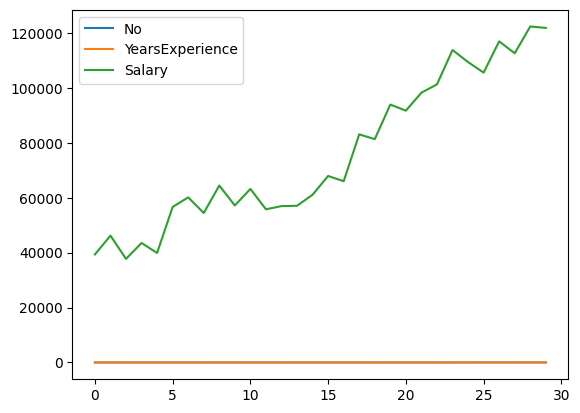

In [30]:
dsalary.plot()

**Ordinary Least Squares (OLS)**

Ordinary Least Squares (OLS) adalah teknik umum untuk memperkirakan koefisien persamaan regresi linier yang menggambarkan hubungan antara satu atau lebih variabel kuantitatif independen dan variabel dependen.

In [33]:
salary_ols =smf.ols(formula='Salary~YearsExperience',data=dsalary).fit()

In [34]:
salary_ols.params

Intercept          24848.203967
YearsExperience     9449.962321
dtype: float64

In [35]:
salary_ols.pvalues

Intercept          1.816526e-11
YearsExperience    1.143068e-20
dtype: float64

In [55]:
salary_ols.rsquared

0.9569566641435086

In [54]:
salary_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        14:31:03   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#mencari prediksi salary berdasarakn YearsExperience
salary_pred=salary_ols.predict(pd.DataFrame(dsalary['YearsExperience']))
salary_pred

0      36188.158752
1      38078.151217
2      39968.143681
3      44693.124842
4      46583.117306
5      53198.090931
6      54143.087163
7      56033.079627
8      56033.079627
9      60758.060788
10     62648.053252
11     63593.049484
12     63593.049484
13     64538.045717
14     68318.030645
15     72098.015574
16     73988.008038
17     75878.000502
18     81547.977895
19     82492.974127
20     90052.943985
21     92887.932681
22    100447.902538
23    103282.891235
24    108007.872395
25    110842.861092
26    115567.842252
27    116512.838485
28    123127.812110
29    125017.804574
dtype: float64

In [48]:
dsalary['salary_pred']=salary_pred

# RMSE
dsalary['RSEd']=(dsalary['Salary']-dsalary['salary_pred'])**2
RSEd=dsalary.sum()['RSEd']
RMSE=np.sqrt(RSEd/200)

# RSE
salary_pred_mean=np.mean(dsalary['salary_pred'])
dsalary['RSEp']=(salary_pred_mean-dsalary['salary_pred'])**2
RSEp=dsalary.sum()['RSEp']
RSE=RSEd/RSEp

salary_mean = np.mean(dsalary['Salary'])
error=RMSE/salary_mean
# print nilai RSE,sales_mean,error
RMSE,RSE,error

(2165.7891767995657, 0.044979399244809, 0.028495726235455578)

In [49]:
# pakai fungsi rmse
from statsmodels.tools.eval_measures import rmse

# calc rmse
rmse_val = rmse(dsalary['Salary'], salary_pred)
rmse_val

5592.043608760659

Text(0.5, 1.0, 'Predicted Salary vs YearsExperience-OLS')

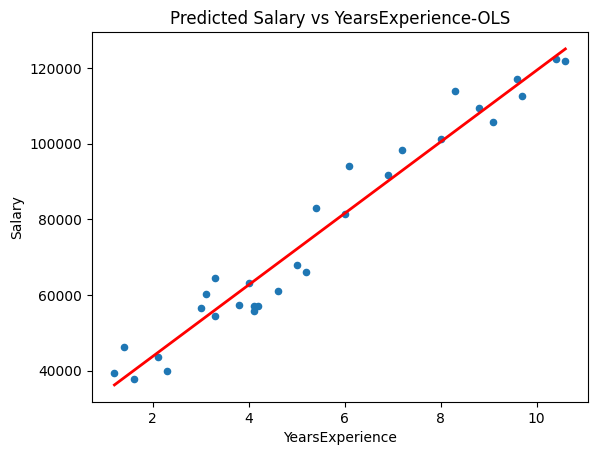

In [87]:
# Plot Salary yang diprediksi vs YearsExperience 
dsalary.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(dsalary['YearsExperience']),salary_pred,c='red',linewidth=2)
plt.title('Predicted Salary vs YearsExperience-OLS')

Bayesian Regression

In [65]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [68]:
regr_bayes = linear_model.BayesianRidge()
regr_bayes.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'tol': 0.001,
 'verbose': False}

In [74]:

years = dsalary['YearsExperience'].values.reshape(-1,1)
salary = dsalary['Salary'].values.reshape(-1,1)

# Train model dengan training set
regr_bayes.fit(years, salary.ravel())

# Prediksi dengan data testing
salary_pred2 = regr_bayes.predict(years)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(salary, salary_pred2, squared = False))

RMSE: 5592.19


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Predicted Salary vs YearsExperience - Bayesian Regression')

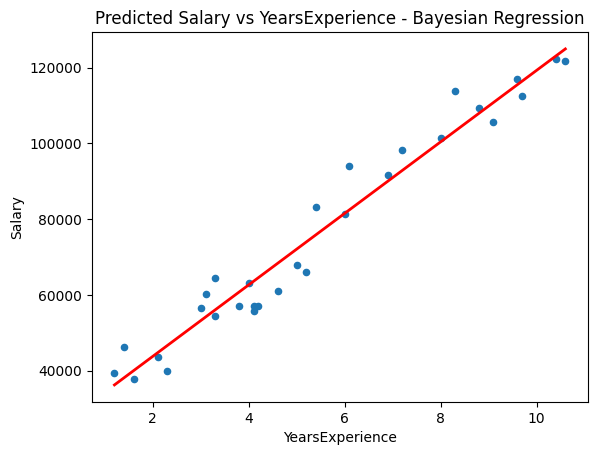

In [75]:
# Plot pengalaman yang diprediksi vs salary 
dsalary.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(dsalary['YearsExperience']),salary_pred2,c='red',linewidth=2)
plt.title('Predicted Salary vs YearsExperience - Bayesian Regression')

Metode SVM Regression

In [76]:
# buat objek SVM regression
from sklearn import svm
regr_svm = svm.LinearSVR()
regr_svm.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [83]:
regr_svm.fit(years, salary.ravel())

# buat prediksi dengan data testing
salary_pred3 = regr_svm.predict(years)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(salary, salary_pred3, squared = False))

RMSE: 79636.99


Text(0.5, 1.0, 'Predicted Salary vs YearsExperience - SVM')

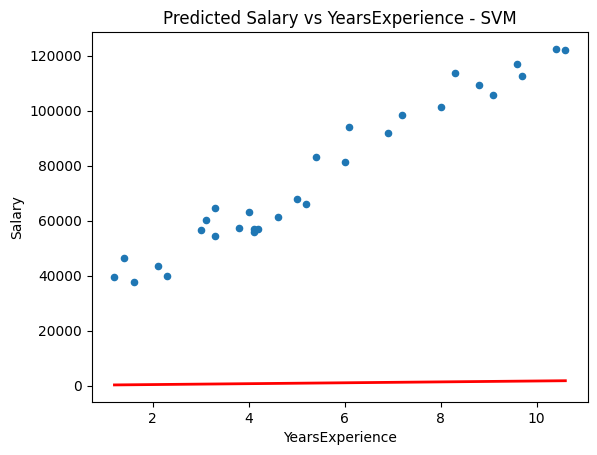

In [86]:
# Plot salary yang diprediksi vs pengalaman 
dsalary.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(dsalary['YearsExperience']),salary_pred3,c='red',linewidth=2)
plt.title('Predicted Salary vs YearsExperience - SVM')